In [ ]:
%load_ext autoreload
%autoreload 2
from src import *

# Correlations

The notion of correlation is present in most of data analysis projects.
A correlation between two variables means that those two variables have a tendency to behave in a similar way.
There is many definitions of "behaving in a similar way", which leads to various tools.
We will present the two most popular definitions of correlation and their behaviour on complex data.

Correlation is a tool to summarize how two variables interact.
It is similar to the mean or median in one dimension.
Different correlation techniques assume some properties on the data, and then compute how related they are under those asumptions.
As a result, the level of correlation may be far from reality if the data does not fit the asumptions.
Like most tools presented in this course, the analyst must be cautious on wether the data have the correct properties to use a specific algorithm.

Correlation is used in many situation where one wish to identify tightly related variables.
In many instances, it is counter productive to consider multiple variables which contain basically the same differenciation of the instances.
Correlation is used to identify roughtly duplicate columns.

In [ ]:
raw = pd.read_parquet(ROOTDIR / 'data' /'interim' / 'breast_cancer.parquet')
print(raw.shape)
raw.head()

(569, 31)


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

The [breast cancer dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) is a well known dataset in wich experts have measured properties in tumors thanks to images.
Then we have a dataset with dozens of measurements per tumor.
Among those properties, we have two interesting variables : ```radius_mean```, ```perimeter_mean```.
This is interesting because those two variables are expected to be highly related.
Indeed, with spherical-like tumors, we expect a relation like $perimeter = 2\pi radius$.
When we graph these two variables, we see indeed a linear relation between them.
We expect a large correlation of those two variables.

In [ ]:
plt.scatter(raw.radius_mean, raw.perimeter_mean, alpha=0.1);

If we look instead at the relation between ```radius``` and ```smoothness``` we observe that there is no obvious relation between them.
Knowing one of the variables does not give us any indication on the probable value of the other.

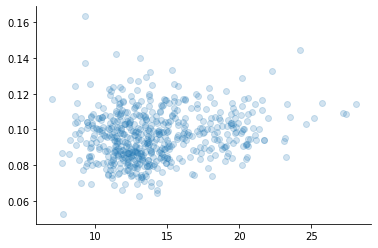

In [ ]:
plt.scatter(raw.radius_mean, raw.smoothness_mean, alpha=0.2);

Sometimes, variables may have a strong non linear relation.
Here we consider non linear transformations of the perimeter column, and we compare them to the radius.
With those two transformations there remains a strong relation between the variables, but there is no straight line anymore.

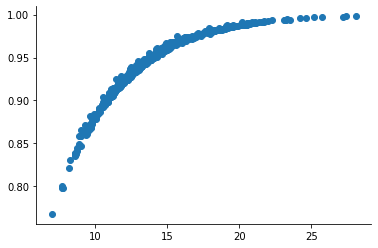

In [ ]:
raw['exp_perimeter'] = 1-np.exp(-raw.perimeter_mean/30)
plt.scatter(raw.radius_mean, raw.exp_perimeter);

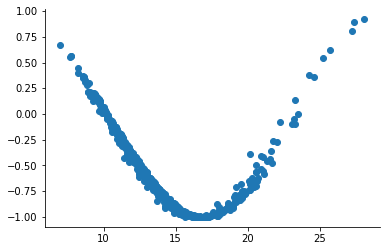

In [ ]:
raw['cos_perimeter'] = np.cos((raw.perimeter_mean-20)/180*2*np.pi)
plt.scatter(raw.radius_mean, raw.cos_perimeter);

Now we can't always see all combination of variables.
**How can we phrase our intuition into a mathematical form?**

## Pearson correlation

Pearson correlation is one of the oldest notion of correlation.
It can be expressed in the following way : there exist a correlation between two variables if there is a tendency for these variables to be above their mean at the same time.
Mathematically, it is expressed with the following formula.

$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
        
The numerator is positive if both variables are on the same side of their mean and negative otherwise.
If the variables are totally independent of each other, negatives and positives should compensate and give a value of 0
If both variables have a tendency to be on the same side, the numerator will be a large positive number.
If both variables have a tendency to be on opposite side, the numerator will a a large negative number.
The denominator limits $r$ between $-1$ if variables have perfect opposite behaviour, and $+1$ if they behave identically. 

Let's look at some examples.

In [ ]:
from scipy.stats import *
import numpy as np

In [ ]:
# A variable correlation with itself is one
pearsonr(np.arange(50), np.arange(50))

(1.0, 0.0)

In [ ]:
# A variable correlation with negative itself is -1
pearsonr(np.arange(50), -np.arange(50))[0]

-1.0

In [ ]:
# A variable correlation with an affine transformation of itself is 1
pearsonr(np.arange(50), 2 + 5*np.arange(50))[0]

1.0

In [ ]:
# However applying to non linear transformation changes drastically the results
pearsonr(np.arange(50), np.exp(np.arange(50)))[0]

0.3525162104692197

We see that even though there is still a strong relation between the two variables, the value of the correlation is much lower.
This is because the pearson correlation expects each variable to be related along a straight line.
When applying the exponential function to our test example, this linear assumption does not stand anymore.
The pearson correlation has no meaning in this case.
The analyst must then always keep in mind that the correlation value is meaningful only under some circonstances.

In [ ]:
def count_above_mean(x):
    m = x.mean()
    print('mean : ', m)
    print('above mean', x[x>m].shape)

In [ ]:
count_above_mean(np.arange(50))

mean :  24.5
above mean (25,)


In [ ]:
count_above_mean(np.exp(np.arange(50)))

mean :  6.034755699228589e+19
above mean (4,)


In [ ]:
plt.scatter(np.arange(50),  np.exp(np.arange(50)) );

Because ```radius``` and ```perimeter``` are affine functions of each others, their correlation is almost perfect.

In [ ]:
pearsonr(raw.radius_mean, raw.perimeter_mean)[0]

0.9978552814938108

Instead ```radius``` and ```smoothness``` have almost no relation so the correlation is close to 0.

In [ ]:
pearsonr(raw.radius_mean, raw.smoothness_mean)[0]

0.17058118749299483

When considering the exponential transformation of the perimeter, the correlation is no more perfect.
However, because our transformation is not so much different from a straight line, the correlation is still high.

In [ ]:
pearsonr(raw.radius_mean, raw.exp_perimeter)[0]

0.8973477786238654

However, the cosine transformation creates a very non-linear relation with the ```radius```.
Then we get an extremely different value, because the pearson correlation is not adapted to this situation.

In [ ]:
pearsonr(raw.radius_mean, raw.cos_perimeter)[0]

-0.43033876451949604

In [ ]:
c = raw[['radius_mean', 'perimeter_mean', 'smoothness_mean', 'exp_perimeter', 'cos_perimeter']].corr()
c

radius_mean  perimeter_mean  smoothness_mean  exp_perimeter  \
radius_mean         1.000000        0.997855         0.170581       0.897348   
perimeter_mean      0.997855        1.000000         0.207278       0.893904   
smoothness_mean     0.170581        0.207278         1.000000       0.140049   
exp_perimeter       0.897348        0.893904         0.140049       1.000000   
cos_perimeter      -0.430339       -0.420607        -0.002714      -0.745344   

                 cos_perimeter  
radius_mean          -0.430339  
perimeter_mean       -0.420607  
smoothness_mean      -0.002714  
exp_perimeter        -0.745344  
cos_perimeter         1.000000

In [ ]:
c['radius_mean']

radius_mean        1.000000
perimeter_mean     0.997855
smoothness_mean    0.170581
exp_perimeter      0.897348
cos_perimeter     -0.430339
Name: radius_mean, dtype: float64

## Spearman correlation

Spearman correlation is an adaptation of Pearson, which do not require variables to be affine transformation of one another to have perfect correlation.
In Spearman, we keep the same formula but replacing the values of the variables by their rank.
Values are sorted in descending order and each variables is replaced by their ranking

* 5 -> 1
* 2 -> 2
* 7 -> 0

In [ ]:
c = raw[['radius_mean', 'perimeter_mean', 'smoothness_mean', 'exp_perimeter', 'cos_perimeter']].corr('spearman')
c

radius_mean  perimeter_mean  smoothness_mean  exp_perimeter  \
radius_mean         1.000000        0.997802         0.148510       0.997802   
perimeter_mean      0.997802        1.000000         0.182923       1.000000   
smoothness_mean     0.148510        0.182923         1.000000       0.182923   
exp_perimeter       0.997802        1.000000         0.182923       1.000000   
cos_perimeter      -0.743876       -0.745764        -0.062276      -0.745764   

                 cos_perimeter  
radius_mean          -0.743876  
perimeter_mean       -0.745764  
smoothness_mean      -0.062276  
exp_perimeter        -0.745764  
cos_perimeter         1.000000

In [ ]:
c['radius_mean']

radius_mean        1.000000
perimeter_mean     0.997802
smoothness_mean    0.148510
exp_perimeter      0.997802
cos_perimeter     -0.743876
Name: radius_mean, dtype: float64

Here we observe that ```radius_mean``` has the same correlation with ```exp_perimeter``` and ```perimeter_mean```.
It is expected.
Those two variables are the same but for a monotonous transformation : the rank of each line remains the same.
The result for ```cos_perimeter``` is still not perfect because the transformation is not monotonous.

## Conclusion

Correlation is an statistical tool that measures the level of relation between variables.
Multiple formula exists, with different assumptions about the data distributions.
Like the mean or the median, those measures aim at summarising the relation between two variables with only one number.
Similarly, this number becoms meaningless when the actual relation is more complex than the assumptions.
As a result, the analyst must keep in mind those limitation and remain critical of the results.

### Exercice

Identify a function ```F``` such that the Pearson or Spearman correlation between ```radius``` and ```F(radius)``` is the closest possible to 0.